# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-11-06**  
**Exercise Sheet Submission Deadline: 2023-11-17, noon (i.e. 12:00), via **moodle** (please do not use e-mail submissions anymore).

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following code loads this raw data and prints it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis


features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

X = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ... nan nan nan]
 [ 7.  3.  2. ... 66. 57. nan]
 ...
 [ 0.  0.  0. ... 30. nan nan]
 [ 1.  0.  0. ... nan nan nan]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.01

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [2]:
data = X.copy()
mean_val= np.nanmean(X[:,4:], axis=1)
mean_val=np.nan_to_num(mean_val)
for i in range(4,9):
    data[:,i]=np.where(np.isnan(X[:,i]),mean_val,X[:,i])

C:\Users\I020434\AppData\Local\Temp\ipykernel_20840\1149727745.py:2: RuntimeWarning: Mean of empty slice
  mean_val= np.nanmean(X[:,4:], axis=1)


### Task 02.02

Next, normalize the data by dividing by the maximum value in each column.

In [3]:
maximum = [np.amax(data[:,i]) for i in range(4,9)]
data[:,4:] = data[:,4:]/maximum

## Principal Component Analysis

### Task 02.03

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=0, the second-largest on x=1, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

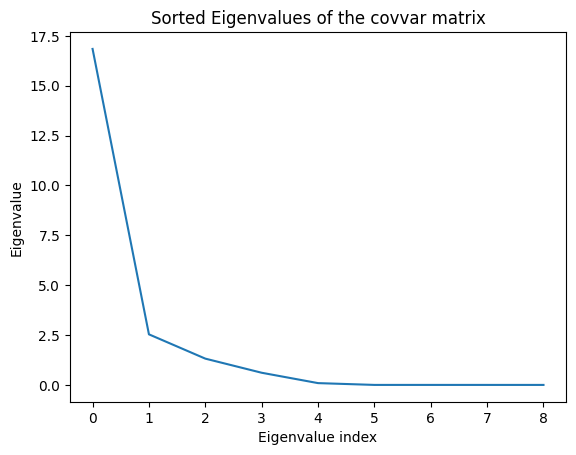

Percentage of variance covered by the first two eigenvalues: 90.5406777415983 %


In [4]:
cov_mat = np.cov(data.T)
eigval= np.linalg.eigvals(cov_mat)
eigval = np.sort(eigval)[::-1]
total_var=np.sum(eigval)
var_firsttwo_eig= (eigval[:2].sum() / total_var) * 100
plt.plot(eigval)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Sorted Eigenvalues of the covvar matrix')
plt.show()
print('Percentage of variance covered by the first two eigenvalues:', var_firsttwo_eig, '%')


### Task 02.04

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

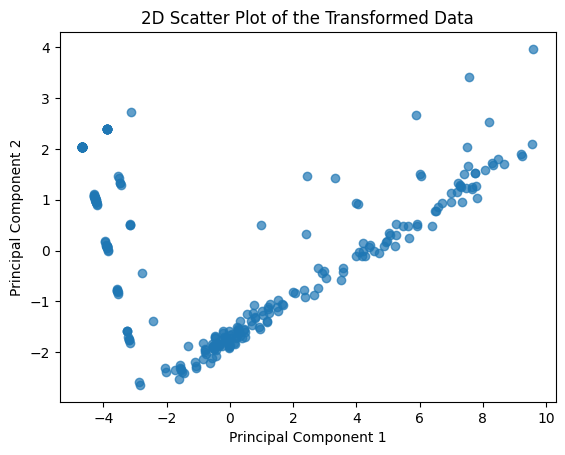

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
latent_data = pca.transform(data)
plt.scatter(latent_data[:, 0], latent_data[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of the Transformed Data')
plt.show()

### Task 02.05 (Bonus Task)

Compute the eigenvalue decomposition of the covariance matrix and perform PCA yourself. Only retain the two components corresponding to the largest eigenvalues and plot the transformed data with a 2D scatter plot. Check whether your plot is consistent with the plot above.

**ANSWER:** The plot is almost consistent. It is flipped because eigenvectors are invariant to sign changes.

## Factor Analysis

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

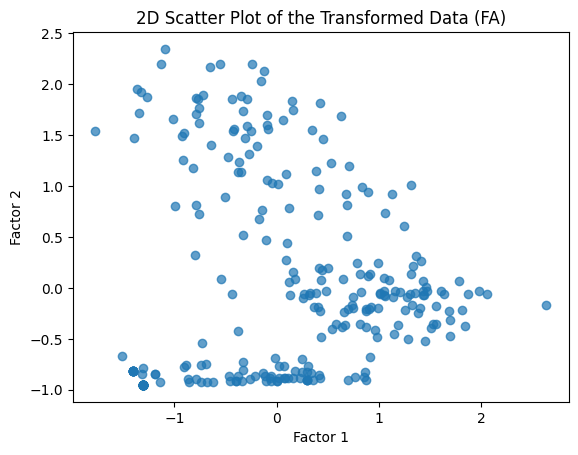

In [6]:
fa = FactorAnalysis(n_components=2, rotation='varimax')
fa.fit(data)
latent_data = fa.transform(data)
plt.scatter(latent_data[:, 0], latent_data[:, 1], alpha=0.7)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('2D Scatter Plot of the Transformed Data (FA)')
plt.show()

**ANSWER:** 

### Task 02.07

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [7]:
factors = fa.components_
print(factors)

[[ 0.11116275 -0.00975411  0.0590245   1.26403362  0.22752914  0.22675139
   0.21643209  0.21627369  0.21795945]
 [ 2.98669366  1.06448495  1.8091436   1.22390412  0.16610132  0.16516251
   0.15721155  0.15795305  0.16556494]]


**ANSWER:** 

## K-Means Clustering

### Task 02.07

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

**ANSWER:**

### Task 02.08

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`.

Get the cluster membership of each point via the `predict` function of the KMeans model.

Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

### Task 02.09 (bonus task)

Repeat the cluster analysis, but perform it on the latent representation according to factor analysis. Plot the new clustering. Check if it is consistent with the plot above.



**ANSWER**

### Task 02.10 (bonus task)

Implement $K$-Means yourself. Check if your result is consistent with the result provided by the `sklearn` implementation.


**ANSWER** 

## Gaussian Mixture Models

### Task 02.11

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

**ANSWER:** 

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`.

Get the cluster membership of each point via the `predict` function of the GaussianMixture model.

Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`.

Get the cluster membership of each point via the `predict` function of the GaussianMixture model.

Provide a scatter plot, where the color of each point represents the cluster membership.

### Task 02.14

Print the mean feature values for each cluster. Try to interpret the clusters: What characterizes the differenct clusters?

**ANSWER:**

### Task 02.15

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \cdot \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \cdot \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal values for $\mu_k$ and $\Sigma_k$

**HINT:** You may use the following general matrix/vector gradient equations (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y) \\
\nabla_W (x - y)^T W (x - y) &= (x-y)(x-y)^T \\
\nabla_{W^{-1}} \log[\det(W)] &= -W & \text{if $W$ is symmetric and positive semi-definite}
\end{align*}

**ANSWER:**
